## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [ ]:
your_name = "Syeda Tanjima Mahmood"
your_student_id = "48738948"

In [12]:
# libraries you might need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [6]:
import pandas as pd

df = pd.read_csv('car_sell.csv')

null_counts_before = df.isnull().sum()
print("Null values in each column before cleaning:")
print(null_counts_before)

initial_length = len(df)
print("\nLength of the data before cleaning:", initial_length)

df_cleaned = df.dropna(subset=['year'])  # Drop rows where 'year' is missing
df_cleaned = df_cleaned[df_cleaned['fuel'].str.lower() != 'none']  # Drop rows where 'fuel' is 'none'

null_counts_after = df_cleaned.isnull().sum()
print("\nNull values in each column after cleaning:")
print(null_counts_after)

final_length = len(df_cleaned)
print("\nLength of the data after cleaning:", final_length)

df_cleaned.head()


Null values in each column before cleaning:
Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

Length of the data before cleaning: 4340

Null values in each column after cleaning:
Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Length of the data after cleaning: 3886


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [7]:
#Q2.1
unique_name_count = df_cleaned['name'].nunique()
unique_seller_type_count = df_cleaned['seller_type'].nunique()
unique_transmission_count = df_cleaned['transmission'].nunique()
unique_owner_count = df_cleaned['owner'].nunique()

print(f"Total number of unique names: {unique_name_count}")
print(f"Total number of unique seller types: {unique_seller_type_count}")
print(f"Total number of unique transmissions: {unique_transmission_count}")
print(f"Total number of unique owners: {unique_owner_count}")

Total number of unique names: 1402
Total number of unique seller types: 3
Total number of unique transmissions: 2
Total number of unique owners: 5


In [8]:
#Q2.2
km_driven_stats = df_cleaned['km_driven'].describe()[['count', 'mean', 'std', 'min', 'max']]

print("\nDescriptive statistics for km_driven:")
print(km_driven_stats)



Descriptive statistics for km_driven:
count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
max      806599.000000
Name: km_driven, dtype: float64


In [9]:
#Q2.3
selling_price_stats_by_seller_type = df_cleaned.groupby('seller_type')['selling_price'].agg(['mean', 'std', 'min', 'max'])

print("\nDescriptive statistics for selling_price grouped by seller_type:")
print(selling_price_stats_by_seller_type)



Descriptive statistics for selling_price grouped by seller_type:
                           mean            std     min      max
seller_type                                                    
Dealer            702093.314961  813597.811832   22000  8900000
Individual        421169.410265  420273.684129   20000  4800000
Trustmark Dealer  935797.872340  655724.299195  315000  2600000


In [11]:
#Q2.4
import datetime

current_year = datetime.datetime.now().year
df_cleaned['years_sold'] = current_year - df_cleaned['year']

years_sold_stats_by_owner = df_cleaned.groupby('owner')['years_sold'].agg(['mean', 'std', 'min', 'max'])

print("\nDescriptive statistics for number of years sold grouped by owner type:")
print(years_sold_stats_by_owner)



Descriptive statistics for number of years sold grouped by owner type:
                           mean       std  min   max
owner                                               
First Owner            9.546209  3.555597  4.0  28.0
Fourth & Above Owner  16.761194  5.248635  4.0  32.0
Second Owner          13.023000  3.840993  5.0  29.0
Test Drive Car         4.357143  0.633324  4.0   6.0
Third Owner           14.586081  3.920266  5.0  27.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

<Figure size 1500x1000 with 0 Axes>

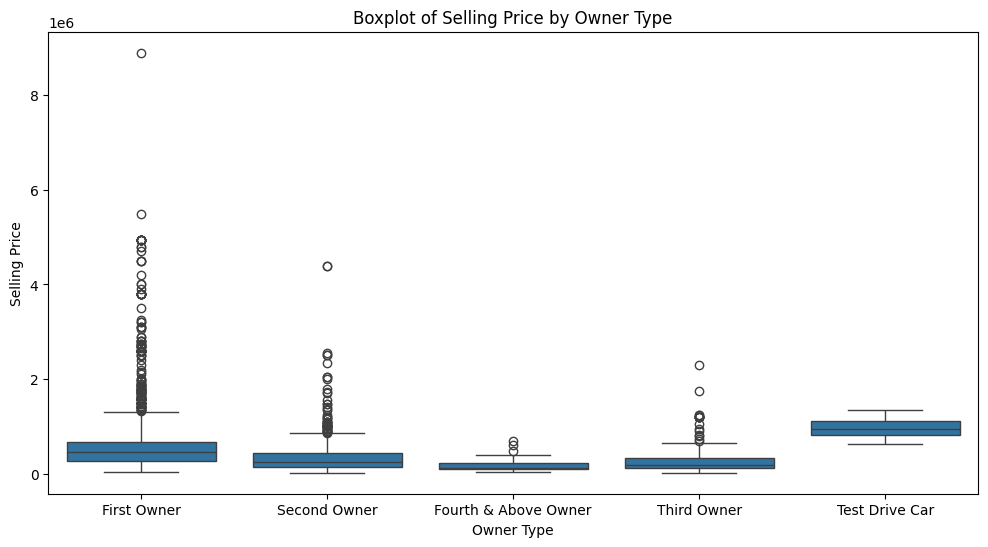

In [14]:
plt.figure(figsize=(15, 10))
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=df_cleaned)
plt.title('Boxplot of Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()
# Boxplot of 'selling_price' by 'fuel'
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_cleaned)
plt.title('Boxplot of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()



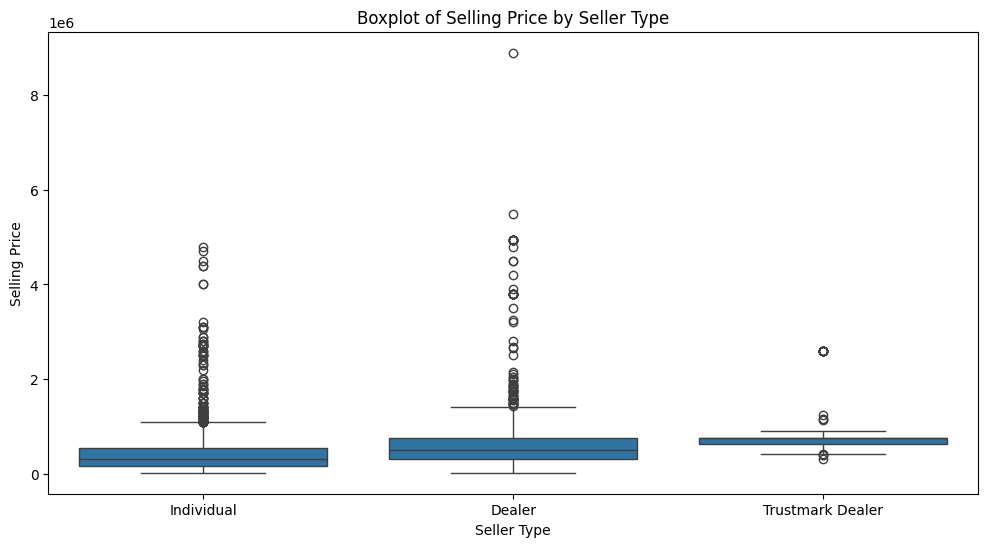

In [16]:
#Boxplot of selling_price by seller_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df_cleaned)
plt.title('Boxplot of Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()


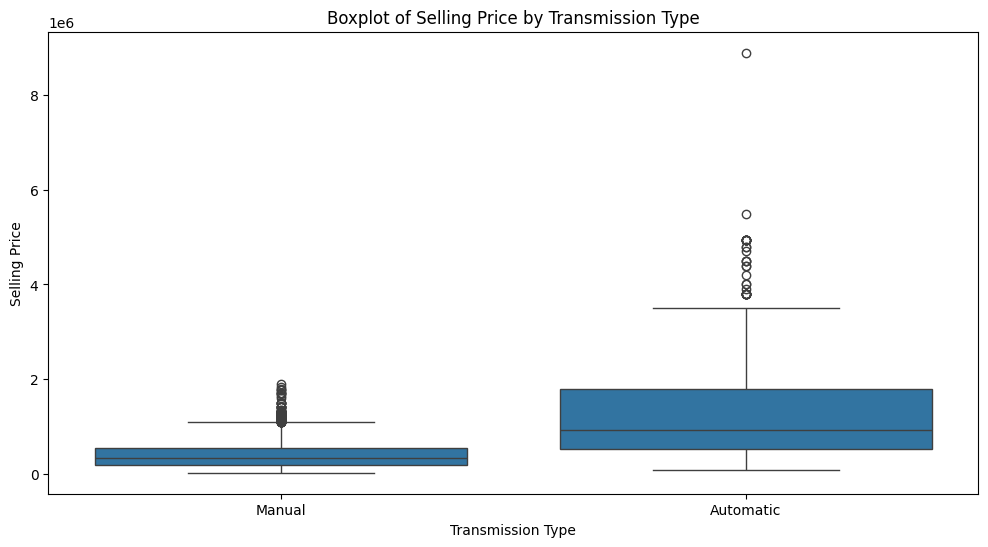

In [15]:
#Boxplot of selling_price by transmission
plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='selling_price', data=df_cleaned)
plt.title('Boxplot of Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


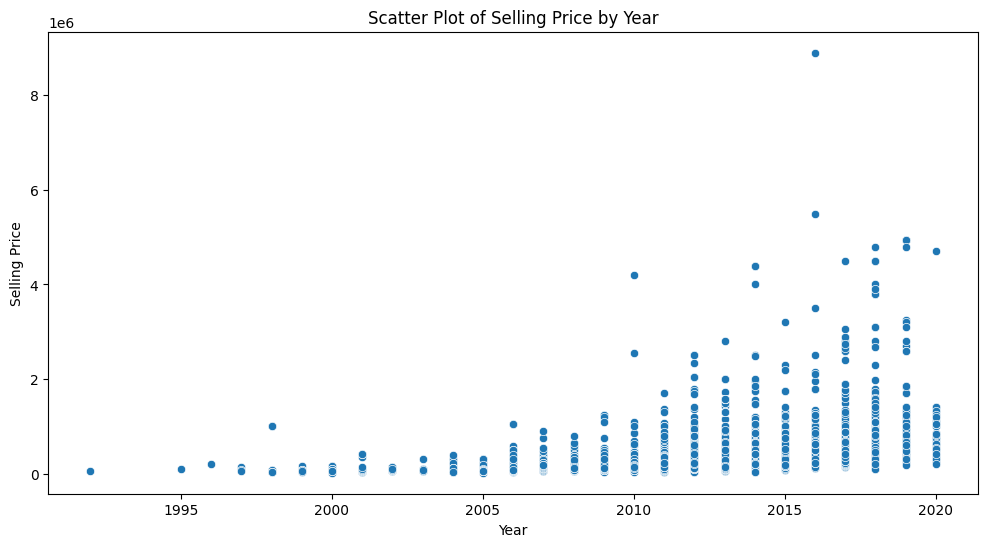

In [17]:
#Scatter Plot of selling_price by year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='selling_price', data=df_cleaned)
plt.title('Scatter Plot of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [18]:
# Filter the data according to the specified rules
df_filtered = df_cleaned[
    (df_cleaned['owner'].isin(['First Owner', 'Second Owner', 'Third Owner'])) &
    (df_cleaned['fuel'].isin(['Diesel', 'Petrol'])) &
    (df_cleaned['seller_type'].isin(['Dealer', 'Individual']))
]

# Print the length of the filtered data
filtered_length = len(df_filtered)
print(f"Length of the data after removing outliers: {filtered_length}")


Length of the data after removing outliers: 3657
